In [49]:
import pandas as pd
import numpy as np
from collections import Counter
import random

import matplotlib.pyplot as plt


# Style

In [47]:
import seaborn as sns
sns.set(
    font="DejaVu Sans",
    rc={
        "axes.axisbelow": False,
        "axes.edgecolor": "lightgrey",
        "axes.facecolor": "None",
        "axes.grid": False,
        "axes.labelcolor": "dimgrey",
        "axes.spines.right": False,
        "axes.spines.top": False,
        "figure.facecolor": "white",
        "lines.solid_capstyle": "round",
        "patch.edgecolor": "w",
        "patch.force_edgecolor": True,
        "text.color": "dimgrey",
        "xtick.bottom": False,
        "xtick.color": "dimgrey",
        "xtick.direction": "out",
        "xtick.top": False,
        "ytick.color": "dimgrey",
        "ytick.direction": "out",
        "ytick.left": False,
        "ytick.right": False,
    },
)
sns.set_context(
    "notebook", rc={"font.size": 16, "axes.titlesize": 20, "axes.labelsize": 18}
)

colors = ["#073b4c", "#ffd166", "#06d6a0", "#118ab2", "#ef476f", "#fb5607"]
patterns = ["/", "\\", "-", "+", "x", "o", "O", ".", "*", "|"]
markers = ["o", "s", "D", "^", "v", "*", "X", "+", "p", "h"]

# Import the file and call the main sheet

In [86]:
from google.colab import files
uploaded = files.upload()

Saving poster-platforms-results.xlsx to poster-platforms-results (4).xlsx


In [99]:
# Get the uploaded filename
filename = list(uploaded.keys())[0]

# Read the Excel sheet named "overview"+
df = pd.read_excel(filename, sheet_name="overview-new")


# Total and poster-containing platform count

In [100]:
platformlink_count = df['platformName'].count()
platformlink_unique_count = df['platformName'].nunique()
unique_rows_count = len(df.drop_duplicates())
poster_df = df[df['containsPoster'].str.lower() == "yes"]

print(f"Total number of platforms: {platformlink_unique_count}")
print(f"All platforms that contain poster: {poster_df['platformName'].nunique()}")



Total number of platforms: 151
All platforms that contain poster: 104


# Total platforms that contains poster and is not derived

In [101]:
filtered_df = df[
    (df['containsPoster'].str.lower() == "yes") &
    (df['isDerived'].str.lower() == "no")
]
# Count total rows that match
total_row_count = len(filtered_df)
print(f"Total rows where containsPoster = 'yes' AND isDerived = 'no': {total_row_count}")

Total rows where containsPoster = 'yes' AND isDerived = 'no': 86


# Search methods:1.   Google 2.   LLM  3.   DataCite


In [102]:
# --- Count total rows ---
total_rows = len(filtered_df)

# --- Count rows by exact searchMethod values ---
count_1 = (filtered_df['searchMethod'] == 1).sum()
count_2 = (filtered_df['searchMethod'] == 2).sum()
count_3 = (filtered_df['searchMethod'] == 3).sum()

print(f"Total rows (containsPoster = yes, isDerived = no): {total_rows}")
print(f"Rows with searchMethod = 1-google: {count_1}")
print(f"Rows with searchMethod = 2-LLM: {count_2}")
print(f"Rows with searchMethod = 3-Datacite: {count_3}")


Total rows (containsPoster = yes, isDerived = no): 86
Rows with searchMethod = 1-google: 5
Rows with searchMethod = 2-LLM: 9
Rows with searchMethod = 3-Datacite: 67


# Total count of published posters that contributed to total counting

In [109]:
# --- Clean up totalPosters column ---
df['totalPosters'] = pd.to_numeric(df['totalPosters'].replace("na", pd.NA), errors='coerce')

# --- Apply filters (all platforms) ---
filtered_df_ = df[
    (df['containsPoster'].str.lower() == "yes") &
    (df['isDerived'].str.lower() == "no") &
    df['totalPosters'].notna() &
    (df['totalPosters'] != -1)]

# --- Count and sum ---
row_count = len(filtered_df_)
total_posters_sum = filtered_df_['totalPosters'].sum()

print(f"Valid rows (all platforms, containsPoster=yes, isDerived=no): {row_count}")
print(f"Sum of totalPosters: {total_posters_sum}")


Valid rows (all platforms, containsPoster=yes, isDerived=no): 43
Sum of totalPosters: 150013.0


# Sum of 4 platform poster count- NTRS, F1000, ZENODO, Figshare that only yearwsise count was possible

In [108]:
# --- Clean up totalPosters column ---
df['totalPosters'] = pd.to_numeric(df['totalPosters'].replace("na", pd.NA), errors='coerce')

# --- Apply filters (all platforms) ---
filtered_df_ = df[
    (df['containsPoster'].str.lower() == "yes") &
    (df['isDerived'].str.lower() == "no") &
    (df['hasSharingDate'].str.lower() == "yes")
]

# --- Count and sum ---
row_count = len(filtered_df_)
yearwise_posters_sum = filtered_df_['totalPosters'].sum()

print(f"Valid rows (all platforms, containsPoster=yes, isDerived=no, hasSharingDate=yes): {row_count}")
print(f"Sum of totalPosters (hasSharingDate=yes): {yearwise_posters_sum}")


Valid rows (all platforms, containsPoster=yes, isDerived=no, hasSharingDate=yes): 4
Sum of totalPosters (hasSharingDate=yes): 55317.0


# 4 mostly shared platform: Zenodo, Figshare, Digital commons and F1000Research poster count

In [111]:
filtered_df_3 = df[
    (df['containsPoster'].str.lower() == "yes") &
                 df['platformName'].isin(["Zenodo", "Figshare", "F1000Research", "Digital Commons"]) &

    (df['isDerived'].str.lower() == "no") &
    df['totalPosters'].notna() &
    (df['totalPosters'] != -1)

]

# --- Count and sum ---
row_count = len(filtered_df_3)                          # how many rows are valid
total_three_platform_sum = filtered_df_3['totalPosters'].sum() # sum of values
percentage = (total_three_platform_sum / total_posters_sum * 100) if total_posters_sum > 0 else 0

print(f"Valid rows (platform = Zenodo/Figshare/F1000Research/DigitalCommons, containsPoster=yes, isDerived=no): {row_count}")
print(f"Sum of total 4 Posters: {total_three_platform_sum} and total poster: {total_posters_sum}")
print(f"Percentage: {percentage:.2f}%")



Valid rows (platform = Zenodo/Figshare/F1000Research/DigitalCommons, containsPoster=yes, isDerived=no): 4
Sum of total 4 Posters: 134645.0 and total poster: 150013.0
Percentage: 89.76%


# Count mostly used platforms that has a DOI

In [ ]:
valid_posters_all = df[df['totalPosters'] != -1]
total_posters_sum = valid_posters_all['totalPosters'].sum()

# --- Filtered: hasDOI = yes AND valid totalPosters ---
filtered_df_doi_ = df[
    (df['hasDOI'].str.lower() == "yes") &
    (df['totalPosters'].notna()) &
    (df['containsPoster'].str.lower() == "yes") &
    (df['isDerived'].str.lower() == "no") &
    (df['totalPosters'] != -1)
]

sum_posters = filtered_df_doi_['totalPosters'].sum()

# --- Percentage ---
percentage = (sum_posters / total_posters_sum) * 100 if total_posters_sum > 0 else 0

print(f"Total posters sum (all valid): {total_posters_sum}")
print(f"Total posters sum (hasDOI = yes): {sum_posters}")
print(f"Percentage: {percentage:.2f}%")


Total posters sum (all valid): 150013.0
Total posters sum (hasDOI = yes): 62873.0
Percentage: 41.91%


# Identifier count

In [112]:
# --- Filter rows where containsPoster = "yes" AND isDerived = "no" ---
posters_df = df[
    (df['containsPoster'].str.lower() == "yes") &
    (df['isDerived'].str.lower() == "no")
].copy()

# --- Filter rows where hasDOI = "yes" as well ---
doi_posters_df = posters_df[
    posters_df['hasDOI'].str.lower() == "yes"
].copy()

# Make sure totalPosters is numeric
doi_posters_df.loc[:, 'totalPosters'] = pd.to_numeric(doi_posters_df['totalPosters'], errors='coerce')

# --- Counts and sums ---
unique_platforms_all = posters_df['platformName'].nunique()
unique_platforms_doi = doi_posters_df['platformName'].nunique()
total_posters_doi = doi_posters_df['totalPosters'].sum(skipna=True)
percentage = (unique_platforms_doi / unique_platforms_all * 100) if unique_platforms_all > 0 else 0
pers_for_total = total_posters_doi/total_posters_sum*100
# --- Output ---
print("For rows where containsPoster='yes' and isDerived='no':")
print(f"- Unique platforms total: {unique_platforms_all}")
print(f"- Unique platforms with DOI: {unique_platforms_doi}")
print(f"- Total number of posters (hasDOI='yes'): {int(total_posters_doi)}")

print(f"- Percentage: {percentage:.2f}%")
print(f"- DOI-issuing platforms account for: {pers_for_total:.2f}%")


For rows where containsPoster='yes' and isDerived='no':
- Unique platforms total: 86
- Unique platforms with DOI: 63
- Total number of posters (hasDOI='yes'): 62841
- Percentage: 73.26%
- DOI-issuing platforms account for: 41.89%


# Fig 2A

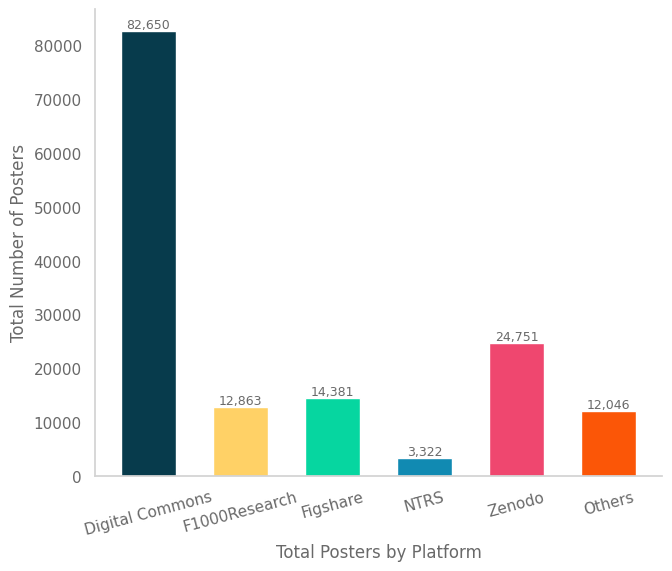

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

poster_plot_df = df[
    (df['isDerived'].str.lower() == "no")
    & df['totalPosters'].notna()
    & (df['totalPosters'] != -1)
]

main_platforms = ["Digital Commons", "Zenodo", "Figshare", "F1000Research", "NTRS"]

main_platform_df = poster_plot_df[poster_plot_df['platformName'].isin(main_platforms)]
other_platform_df = poster_plot_df[~poster_plot_df['platformName'].isin(main_platforms)]

main_sum = main_platform_df.groupby('platformName')['totalPosters'].sum()
others_sum = pd.Series({'Others': other_platform_df['totalPosters'].sum()})

plot_data = pd.concat([main_sum, others_sum])
plot_data = plot_data.loc[plot_data.index.intersection(main_platforms + ["Others"])]

palette = colors[:len(plot_data)]

fig, ax = plt.subplots(figsize=(7, 6))
bars = ax.bar(plot_data.index, plot_data.values, color=palette, width=0.6)

ax.set_ylabel("Total Number of Posters", fontsize=12)
ax.set_xlabel("Total Posters by Platform", fontsize=12)
ax.set_xticks(range(len(plot_data)))                     # fix locator
ax.set_xticklabels(plot_data.index, rotation=15)         # fix warning

for bar in bars:
    height = bar.get_height()
    if pd.notna(height):
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f"{int(height):,}",
            ha="center",
            va="bottom",
            fontsize=9
        )

fig.tight_layout()
plt.show()

#Figure 2b

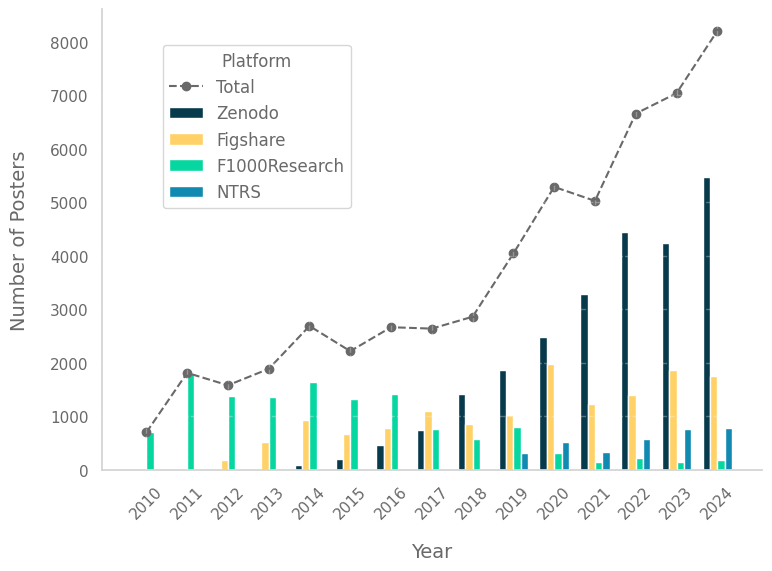

In [79]:
filename = list(uploaded.keys())[0]
xls = pd.ExcelFile(filename)
main_platforms = ["Zenodo", "Figshare", "F1000Research", "NTRS"]
total_sheets = [s for s in xls.sheet_names if s in main_platforms]

combined = []
for sheet in total_sheets:
    df = pd.read_excel(xls, sheet_name=sheet)
    df.columns = df.columns.str.strip()
    df = df[(df['year'] >= 2010) & (df['year'] <= 2024)]
    df['platform'] = sheet
    combined.append(df[['year', 'numberPoster', 'platform']])

df_all = pd.concat(combined)
total_df = df_all.groupby('year')['numberPoster'].sum().reset_index()

# --- Pivot for grouped bars ---
pivot_df = df_all.pivot(index='year', columns='platform', values='numberPoster').fillna(0)
pivot_df.index = pivot_df.index.astype(int)
years = pivot_df.index
x = np.arange(len(years))
width = 0.18

# --- Use the global 'colors' from your seaborn setup ---
plt.figure(figsize=(8, 6))
for i, platform in enumerate(main_platforms):
    plt.bar(
        x + i * width,
        pivot_df[platform],
        width,
        label=platform,
        color=colors[i % len(colors)]
    )

# --- Optional total line ---
plt.plot(
    x + width * 1.5,
    total_df['numberPoster'],
    color='dimgrey',
    marker='o',
    linestyle='--',
    label='Total'
)

plt.xticks(x + width * 1.5, years.astype(int), rotation=45)
plt.xlabel("Year", fontsize=14, labelpad=15)
plt.ylabel("Number of Posters", fontsize=14, labelpad=15)
plt.legend(title="Platform", loc="upper left", bbox_to_anchor=(0.08, 0.94), frameon=True, fontsize=12)

plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

# Merged Figure 2

/tmp/ipython-input-2675535300.py:87: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


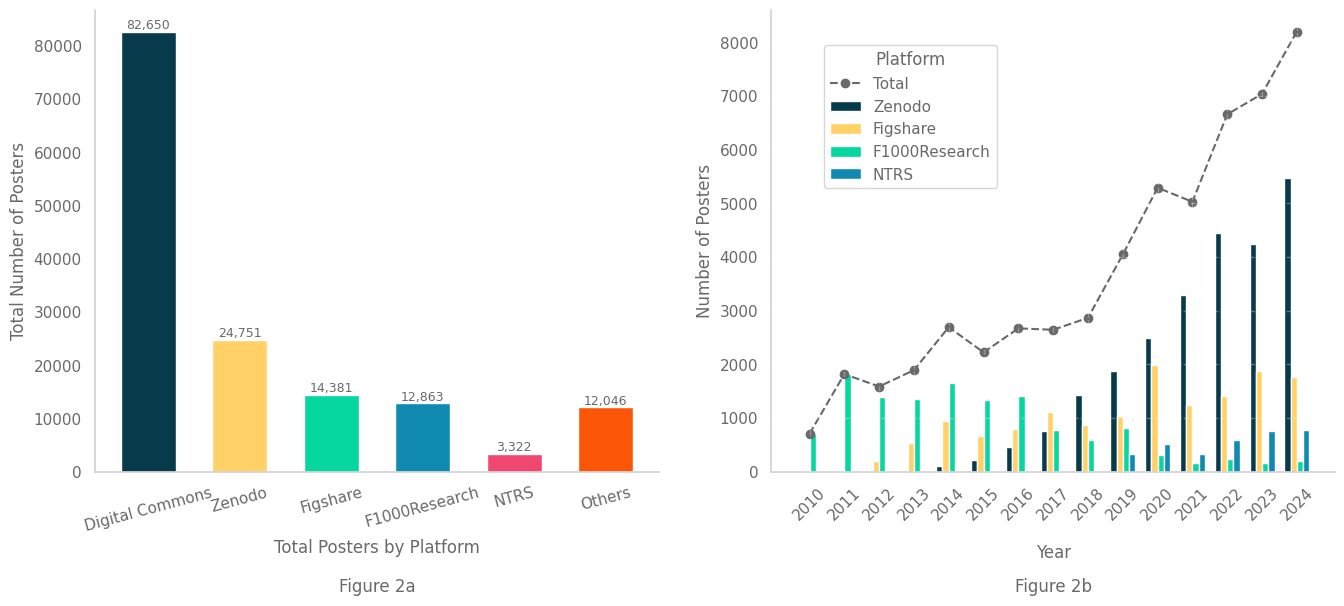

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- Shared figure ---
fig, (ax1, ax2) = plt.subplots(
    1, 2,
    figsize=(16, 6),
    gridspec_kw={'width_ratios': [1, 1], 'wspace': 0.2}
)

# ========== FIGURE 2A ==========
poster_plot_df = df[
    (df['isDerived'].str.lower() == "no")
    & df['totalPosters'].notna()
    & (df['totalPosters'] != -1)
]

main_platforms_a = ["Digital Commons", "Zenodo", "Figshare", "F1000Research", "NTRS"]
main_platform_df = poster_plot_df[poster_plot_df['platformName'].isin(main_platforms_a)]
other_platform_df = poster_plot_df[~poster_plot_df['platformName'].isin(main_platforms_a)]

main_sum = main_platform_df.groupby('platformName')['totalPosters'].sum()
others_sum = pd.Series({'Others': other_platform_df['totalPosters'].sum()})
plot_data = plot_data.loc[plot_data.index.intersection(main_platforms_a + ["Others"])]
plot_data = plot_data.reindex(main_platforms_a + ["Others"])
palette = colors[:len(plot_data)]

bars = ax1.bar(plot_data.index, plot_data.values, color=palette, width=0.6)
ax1.set_ylabel("Total Number of Posters", fontsize=12)
ax1.set_xlabel("Total Posters by Platform", fontsize=12)
ax1.set_xticks(range(len(plot_data)))
ax1.set_xticklabels(plot_data.index, rotation=15)

# Move title below the plot
ax1.text(0.5, -0.25, "Figure 2a", transform=ax1.transAxes,
         ha="center", va="center", fontsize=12)

for bar in bars:
    h = bar.get_height()
    if pd.notna(h):
        ax1.text(bar.get_x() + bar.get_width()/2, h, f"{int(h):,}",
                 ha="center", va="bottom", fontsize=9)

# ========== FIGURE 2B ==========
filename = list(uploaded.keys())[0]
xls = pd.ExcelFile(filename)
main_platforms_b = ["Zenodo", "Figshare", "F1000Research", "NTRS"]
total_sheets = [s for s in xls.sheet_names if s in main_platforms_b]

combined = []
for sheet in total_sheets:
    d = pd.read_excel(xls, sheet_name=sheet)
    d.columns = d.columns.str.strip()
    d = d[(d['year'] >= 2010) & (d['year'] <= 2024)]
    d['platform'] = sheet
    combined.append(d[['year', 'numberPoster', 'platform']])

df_all = pd.concat(combined)
total_df = df_all.groupby('year')['numberPoster'].sum().reset_index()
pivot_df = df_all.pivot(index='year', columns='platform', values='numberPoster').fillna(0)
pivot_df.index = pivot_df.index.astype(int)

years = pivot_df.index
x = np.arange(len(years))
width = 0.18

for i, platform in enumerate(main_platforms_b):
    ax2.bar(x + i*width, pivot_df[platform], width,
            label=platform, color=colors[i % len(colors)])

ax2.plot(x + width*1.5, total_df['numberPoster'],
         color='dimgrey', marker='o', linestyle='--', label='Total')

ax2.set_xticks(x + width*1.5)
ax2.set_xticklabels(years.astype(int), rotation=45)
ax2.set_xlabel("Year", fontsize=12, labelpad=15)
ax2.set_ylabel("Number of Posters", fontsize=12)
ax2.text(0.5, -0.25, "Figure 2b", transform=ax2.transAxes,
         ha="center", va="center", fontsize=12)
ax2.legend(title="Platform", loc="upper left", bbox_to_anchor=(0.08, 0.94),
           frameon=True, fontsize=11)
ax2.grid(True, linestyle="--", alpha=0.3)

# Add spacing between subplots
plt.subplots_adjust(wspace=0.4)
plt.tight_layout()
plt.show()


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # left=2a, right=2b
